In [1]:
#%% PREAMBLE
Plots_Path = '/Users/brunogoes/Dropbox/00--Thesis/Figures/Chap3/'

#Qutip
from qutip import *
from qutip.piqs import *

#from collections import namedtuple

#Scipy
import scipy as sp
import scipy.integrate as integrate
import scipy.special as special
import scipy.sparse as spr
from scipy.sparse.linalg import eigs
from scipy.integrate import quad, dblquad

#Matplotlib
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#For latex fonts in the plots
mpl.rc('font', family='serif')
plt.rc('text', usetex=True)
Font_Size = 32 #default font size for my plots

# For indexing plots smartly and automatically
import string
alphabet = list(string.ascii_lowercase)

#Math
import csv
import numpy as np
import math as mt
import sympy as sym
from sympy import Matrix
from sympy.solvers import solve
from sympy import Symbol #symbolic math
from sympy import *

#For doing an animation of the Bloch sphere
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Bonus
import itertools as itr
from tqdm import tqdm_notebook
import time
import imageio
import time, sys
from IPython.display import clear_output
from scipy.sparse.linalg import eigs
import pickle

from tqdm import tqdm

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Fock space truncation dimension
N = 50
# Vacuum state
vac = basis(N, 0)
# Squeezing operator
#s = squeeze(N, 1)

# Density matrices of the example states
rho_coherent = coherent_dm(N, np.sqrt(2))
rho_thermal = thermal_dm(N, 2)
rho_fock1 = fock_dm(N, 1)
#rho_squeezed = ket2dm(s*vac)

# Reta xy
xvec = np.linspace(-5,5,300)

# Compute the Wigner functions

In [3]:
W_coherent = wigner(rho_coherent, xvec, xvec, g=2)#g=2 is necessary because of a strange scaling factor that qutip uses. 

W_thermal = wigner(rho_thermal, xvec, xvec, g=2)

W_fock1 = wigner(rho_fock1, xvec, xvec, g=2)

#W_squeezed = wigner(rho_squeezed, xvec, xvec, g=2)

# Compute the Q-functions

In [4]:
Q_coherent = qfunc(rho_coherent, xvec, xvec, g=2)

Q_thermal = qfunc(rho_thermal, xvec, xvec, g=2)

Q_fock1 = qfunc(rho_fock1, xvec, xvec, g=2)

#Q_squeezed = qfunc(rho_squeezed, xvec, xvec, g=2)

# Wigner function contour plots

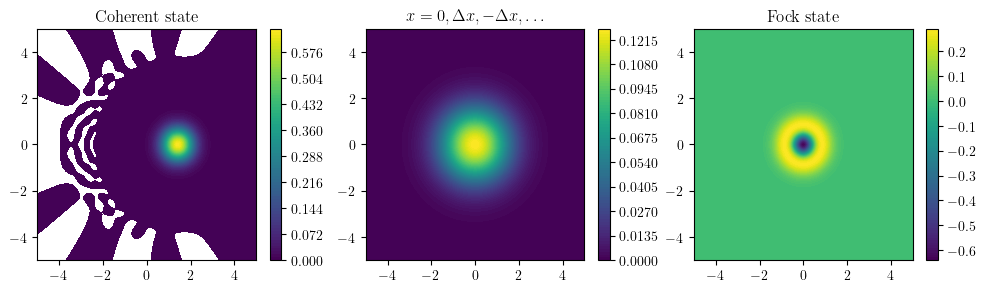

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cb0 = fig.colorbar(cont0, ax=axes[0])

cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)
lbl1 = axes[1].set_title(r"$x=0,\Delta x, -\Delta x, \ldots$")
cb1 = fig.colorbar(cont1, ax=axes[1])

#cont2 = axes[2].contourf(xvec, xvec, W_squeezed, 100)
#lbl2 = axes[2].set_title("Squeezed state")
#cb2 = fig.colorbar(cont2, ax=axes[2])

cont3 = axes[2].contourf(xvec, xvec, W_fock1, 100)
lbl3 = axes[2].set_title("Fock state")
cb3 = fig.colorbar(cont3, ax=axes[2])

plt.savefig(Plots_Path+'WignerFuctionExamples.svg',bbox_inches='tight')
plt.show()

In [8]:
# Reta xy
xvec = np.linspace(-5,5,500)
# The differenttial in the phase space is given by:
dxdy =(xvec[1] - xvec[0])**2 

WignerNegativityfock = []

numberstates = np.arange(0,4,1)

rho_fock = {}
W_fock = {}

for n in tqdm(numberstates):
    rho_fock[n] = fock_dm(N, n)
    
    W_fock[n] = wigner(rho_fock[n], xvec, xvec, g=2)
    
    computefor3 = sum(dxdy*abs(W_fock[n]))-1
    
    WignerNegativityfock.append(computefor3)

100%|█████████████████████████████████████████████| 4/4 [00:17<00:00,  4.32s/it]


In [9]:
#%%% WIGNER FUNCTION NEGATIVITY
computefor1 = sum(dxdy*abs(W_coherent))-1
computefor2 = sum(dxdy*abs(W_thermal))-1
computefor3 = sum(dxdy*abs(W_fock))-1

TypeError: bad operand type for abs(): 'dict'

In [10]:
#Calibrating the color map
# Setting the colormap of the Wigner function following example in:
# https://qutip.org/docs/3.1.0/guide/guide-visualization.html
psicalibrationcolormap = (basis(10, 0) + basis(10, 3) + basis(10, 9)).unit()
xveccalibrationcolormap = np.linspace(-2.5, 2.5, 500)
Wcalibrationcolormap = wigner(psicalibrationcolormap, xveccalibrationcolormap, xveccalibrationcolormap)

# Color map normalization:
cmap = wigner_cmap(Wcalibrationcolormap)  # Generate Wigner colormap
normalizer = mpl.colors.Normalize(W_fock[3].min(), W_fock[0].max())

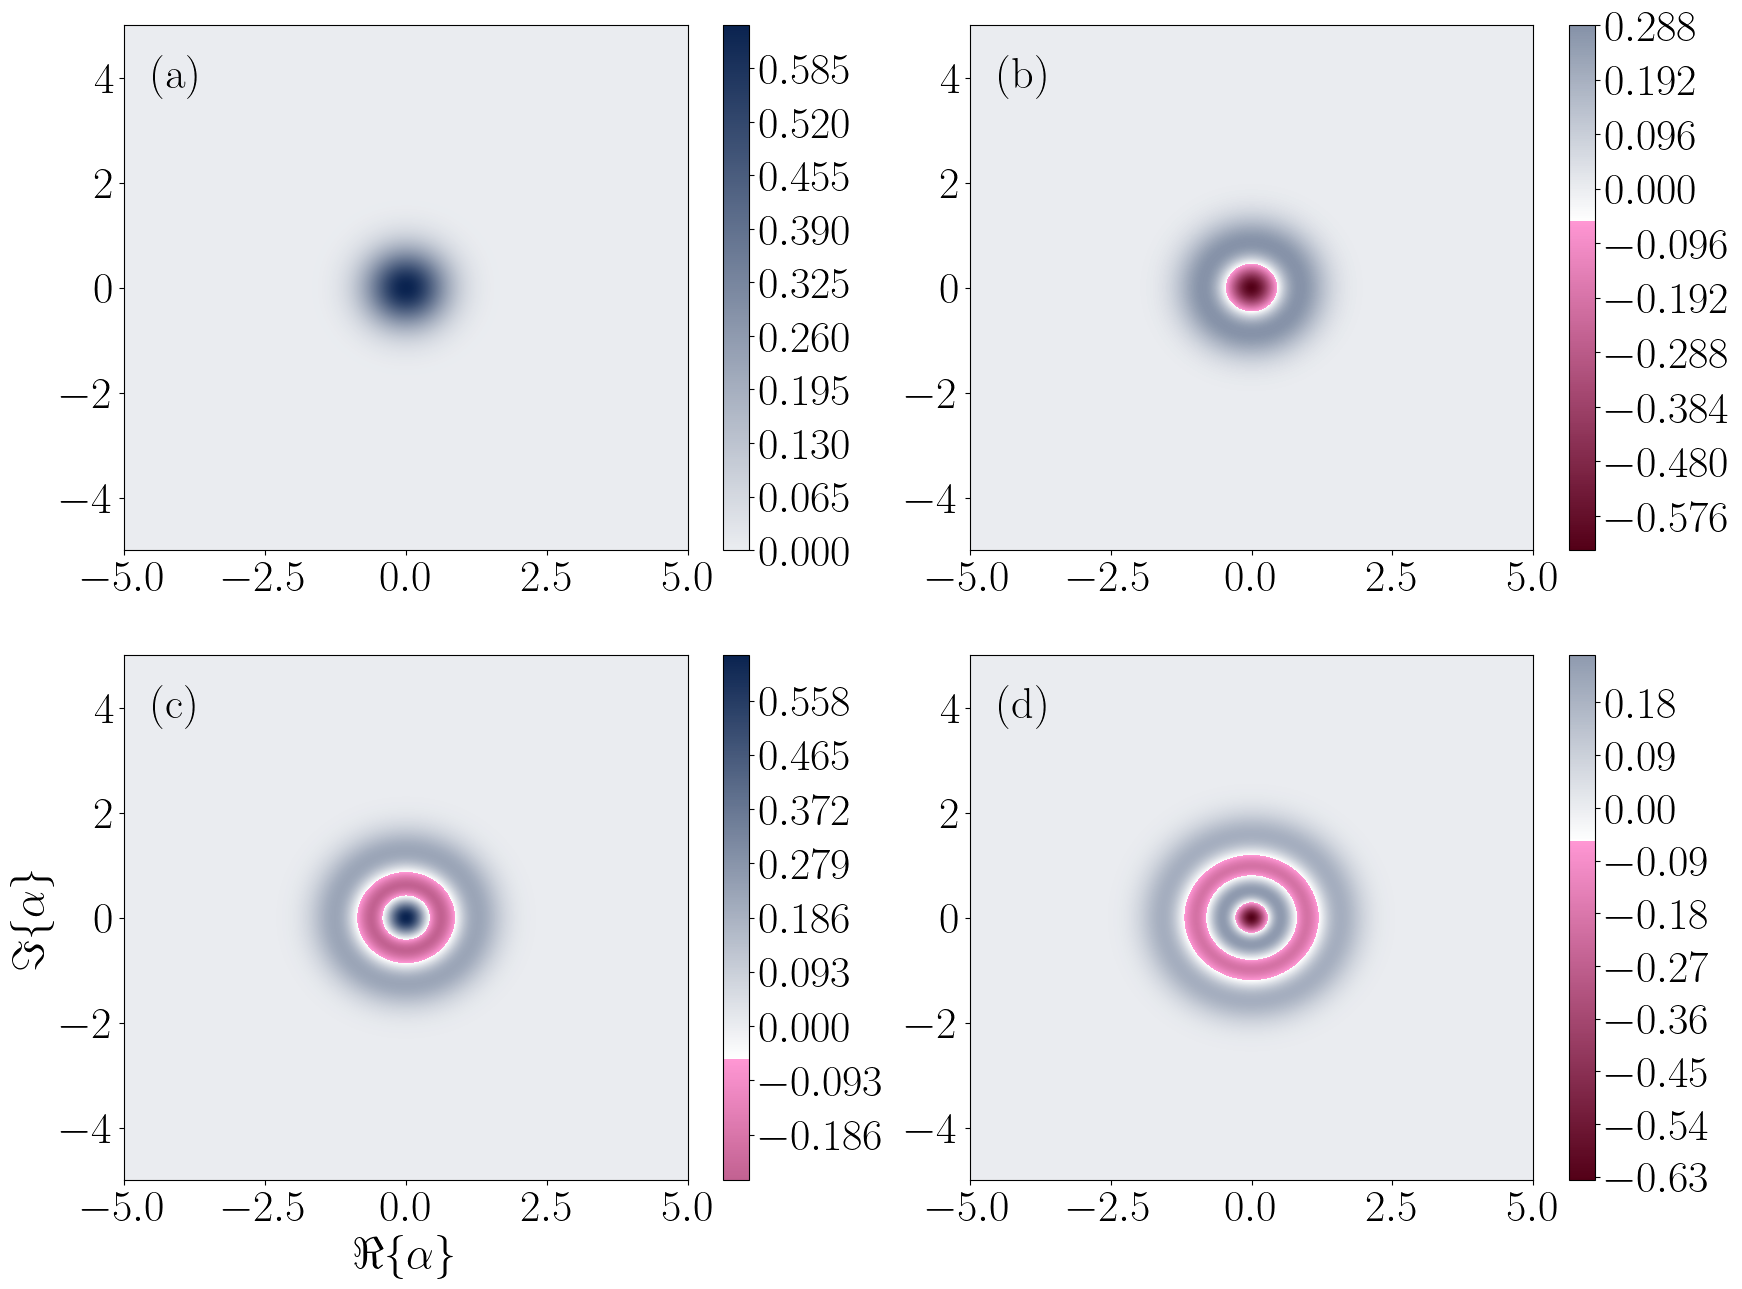

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))

matplotlib.rc('xtick', labelsize=Font_Size) 
matplotlib.rc('ytick', labelsize=Font_Size) 

cont0 = axes[0,0].contourf(xvec, xvec, W_fock[0], 300, cmap = cmap, norm = normalizer)
axes[0,0].annotate('('+alphabet[0]+')', xy=(0.05,0.88), xycoords= 'axes fraction',fontsize=Font_Size)
#axes[0,0].set_xlabel(r'$\Re\{\alpha\}$', fontsize=Font_Size)
#axes[0,0].set_ylabel(r'$\Im\{\alpha\}$', fontsize=Font_Size)
cb0 = fig.colorbar(cont0, ax=axes[0,0])

cont1 = axes[0,1].contourf(xvec, xvec, W_fock[1], 300, cmap = cmap, norm = normalizer)
cb1 = fig.colorbar(cont1, ax=axes[0,1])
axes[0,1].annotate('('+alphabet[1]+')', xy=(0.05,0.88), xycoords= 'axes fraction',fontsize=Font_Size)
#axes[0,1].set_xlabel(r'$\Re\{\alpha\}$', fontsize=Font_Size)
#axes[0,1].set_ylabel(r'$\Im\{\alpha\}$', fontsize=Font_Size)

cont3 = axes[1,0].contourf(xvec, xvec, W_fock[2], 300, cmap = cmap, norm = normalizer)
cb3 = fig.colorbar(cont3, ax=axes[1,0])
axes[1,0].annotate('('+alphabet[2]+')', xy=(0.05,0.88), xycoords= 'axes fraction',fontsize=Font_Size)
axes[1,0].set_xlabel(r'$\Re\{\alpha\}$', fontsize=Font_Size)
axes[1,0].set_ylabel(r'$\Im\{\alpha\}$', fontsize=Font_Size)

cont4 = axes[1,1].contourf(xvec, xvec, W_fock[3], 300, cmap = cmap, norm = normalizer)
cb4 = fig.colorbar(cont4, ax=axes[1,1])
axes[1,1].annotate('('+alphabet[3]+')', xy=(0.05,0.88), xycoords= 'axes fraction',fontsize=Font_Size)
#axes[1,1].set_xlabel(r'$\Re\{\alpha\}$', fontsize=Font_Size)
#axes[1,1].set_ylabel(r'$\Im\{\alpha\}$', fontsize=Font_Size)

# Making space for the colorbar for both plots using the cb of the ground state.
#cbar_ax = fig.add_axes([1.05, 0.15, 0.05, 0.7])
#fig.colorbar(cont4, cax=cbar_ax)

plt.savefig(Plots_Path+'WignerFuctionNumberStateExamples.svg',bbox_inches='tight')
plt.savefig(Plots_Path+'WignerFuctionNumberStateExamples.pdf',bbox_inches='tight')
plt.show()

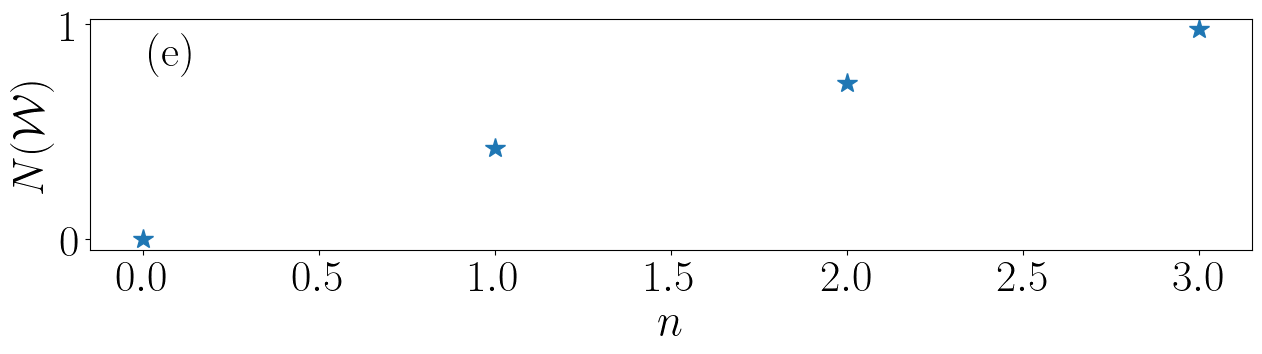

In [24]:
fig, axs = plt.subplots(1, 1, figsize = (15,3))
gs = gridspec.GridSpec(1,1)

axs.plot(numberstates, WignerNegativityfock, '*', markersize = 15)

# Axis identifiers and aesthetics.
axs.set_xlabel(r'$n$',fontsize = Font_Size)
axs.set_ylabel(r'$N(\mathcal{W})$',fontsize = Font_Size)
axs.tick_params(axis='x', labelsize=Font_Size)
axs.tick_params(axis='y', labelsize=Font_Size)

axs.annotate('('+alphabet[4]+')', xy=(0.05,0.8), xycoords= 'axes fraction',fontsize=Font_Size)


plt.savefig(Plots_Path+'WignerFunctionNegativitiesExamples.pdf',bbox_inches='tight')
plt.savefig(Plots_Path+'WignerFunctionNegativitiesExamples.svg',bbox_inches='tight')
plt.show()

In [ ]:
# Q-function contour plots
fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, Q_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cb0 = fig.colorbar(cont0, ax=axes[0])

cont1 = axes[1].contourf(xvec, xvec, Q_thermal, 100)
lbl1 = axes[1].set_title("Thermal state")
cb1 = fig.colorbar(cont1, ax=axes[1])

#cont2 = axes[2].contourf(xvec, xvec, Q_squeezed, 100)
#lbl2 = axes[2].set_title("Squeezed state")
#cb2 = fig.colorbar(cont2, ax=axes[2])

cont3 = axes[2].contourf(xvec, xvec, Q_fock, 100)
lbl3 = axes[2].set_title("Fock state")
cb3 = fig.colorbar(cont3, ax=axes[2])

plt.savefig(Plots_Path+'QfunctionExamples.pdf',bbox_inches='tight')
plt.show()